### **Воронцова Алина Владимировна**
### ИУ5-22М
### Вариант 4

Необходимо решить задачу классификации текстов на основе любого выбранного Вами датасета (кроме примера, который рассматривался в лекции). Классификация может быть бинарной или многоклассовой. Целевой признак из выбранного Вами датасета может иметь любой физический смысл, примером является задача анализа тональности текста.

Необходимо сформировать два варианта векторизации признаков - на основе CountVectorizer и на основе TfidfVectorizer.

В качестве классификаторов необходимо использовать RandomForestClassifier и   LogisticRegression
Для каждого метода необходимо оценить качество классификации. Сделайте вывод о том, какой вариант векторизации признаков в паре с каким классификатором показал лучшее качество.
Для решения задачи классификации текстов я выберу датасет  "20 newsgroups", который содержит тексты из 20 различных новостных групп".

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка датасета "20 newsgroups"
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

X = newsgroups_data.data
y = newsgroups_data.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация признаков на основе CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Векторизация признаков на основе TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Обучение и оценка RandomForestClassifier с CountVectorizer
rf_count = RandomForestClassifier()
rf_count.fit(X_train_count, y_train)
rf_count_pred = rf_count.predict(X_test_count)
accuracy_rf_count = accuracy_score(y_test, rf_count_pred)
print("Accuracy RandomForestClassifier с CountVectorizer:", accuracy_rf_count)

# Обучение и оценка RandomForestClassifier с TfidfVectorizer
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
rf_tfidf_pred = rf_tfidf.predict(X_test_tfidf)
accuracy_rf_tfidf = accuracy_score(y_test, rf_tfidf_pred)
print("Accuracy RandomForestClassifier с TfidfVectorizer:", accuracy_rf_tfidf)

# Обучение и оценка LogisticRegression с CountVectorizer
lr_count = LogisticRegression(max_iter=1000)
lr_count.fit(X_train_count, y_train)
lr_count_pred = lr_count.predict(X_test_count)
accuracy_lr_count = accuracy_score(y_test, lr_count_pred)
print("Accuracy LogisticRegression с CountVectorizer:", accuracy_lr_count)

# Обучение и оценка LogisticRegression с TfidfVectorizer
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
lr_tfidf_pred = lr_tfidf.predict(X_test_tfidf)
accuracy_lr_tfidf = accuracy_score(y_test, lr_tfidf_pred)
print("Accuracy LogisticRegression с TfidfVectorizer:", accuracy_lr_tfidf)


Accuracy RandomForestClassifier с CountVectorizer: 0.8480106100795756
Accuracy RandomForestClassifier с TfidfVectorizer: 0.8355437665782494
Accuracy LogisticRegression с CountVectorizer: 0.8846153846153846
Accuracy LogisticRegression с TfidfVectorizer: 0.8936339522546419


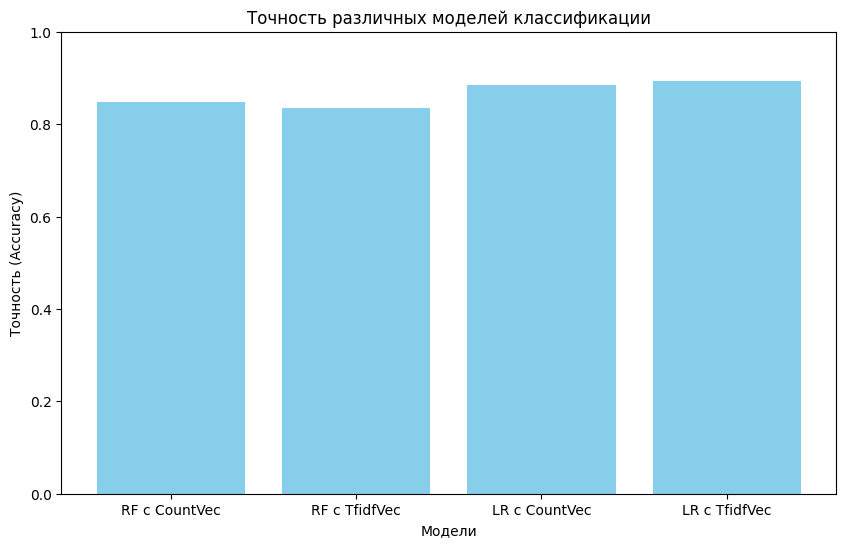

In [2]:
import matplotlib.pyplot as plt

# Точность каждой модели
accuracies = [accuracy_rf_count, accuracy_rf_tfidf, accuracy_lr_count, accuracy_lr_tfidf]
models = ['RF с CountVec', 'RF с TfidfVec', 'LR с CountVec', 'LR с TfidfVec']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Модели')
plt.ylabel('Точность (Accuracy)')
plt.title('Точность различных моделей классификации')
plt.ylim(0, 1)  # Установим предел по оси y от 0 до 1 для процента точности
plt.show()
